In [1]:
import pandas as pd
import numpy as np

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
df = pd.read_csv(url, names=column_names)

# Replace "?" with NaN and convert types
df.replace("?", np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Standardize numerical columns
scaler = StandardScaler()
features = df_imputed.drop("target", axis=1)
features_scaled = scaler.fit_transform(features)

X = pd.DataFrame(features_scaled, columns=features.columns)
y = (df_imputed["target"] > 0).astype(int)  # Binary classification (1 = heart disease)


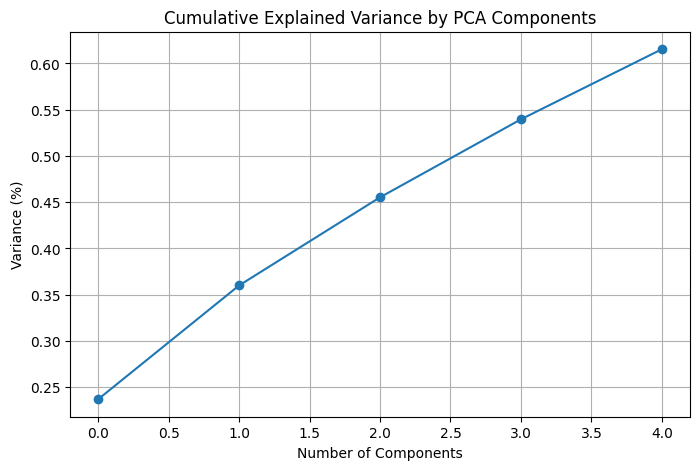

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.grid(True)
plt.show()



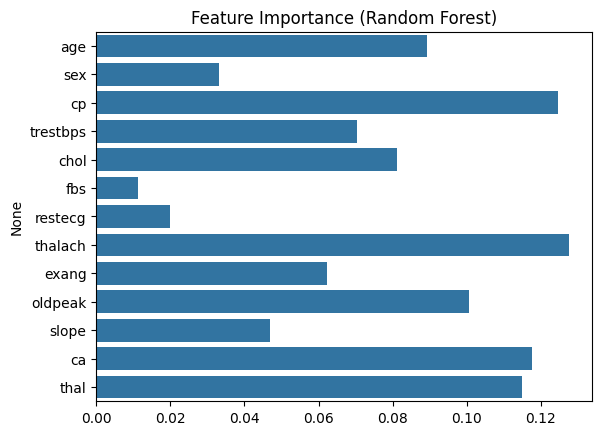

In [4]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Fit RandomForest for feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature importance plot
importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title('Feature Importance (Random Forest)')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n{name} Performance:\n", classification_report(y_test, y_pred))



Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Decision Tree Performance:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73        29
           1       0.78      0.66      0.71        32

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61


Random Forest Performance:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87  

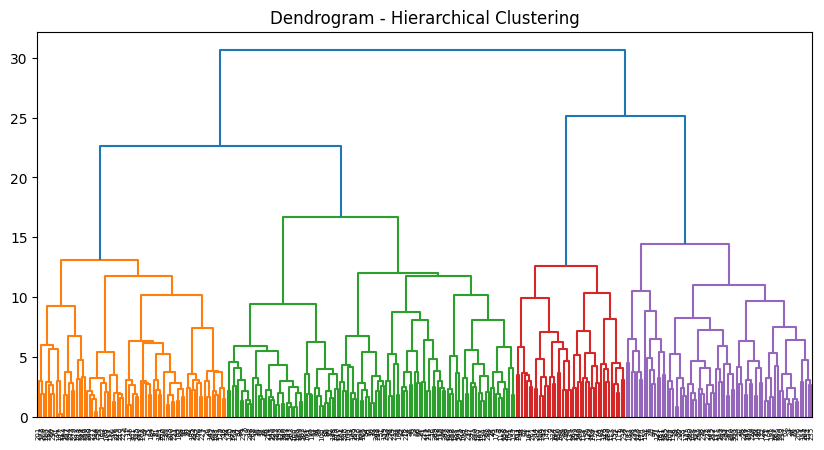

In [6]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Hierarchical clustering
linked = linkage(X, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram - Hierarchical Clustering")
plt.show()


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'max_depth': 3, 'n_estimators': 100}
Best Score: 0.8305272108843538


In [8]:
import joblib

# Save best model
joblib.dump(grid.best_estimator_, "final_model.pkl")


['final_model.pkl']